In [1]:
# importing libraries
import pandas as pd
import numpy as np

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
# importing the oscars dataset
ML_dataset=pd.read_csv('data/pictures_combined6.csv')

In [3]:
# checking
ML_dataset.isna().sum()
ML_dataset.dtypes
ML_dataset.columns

Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'film',
       'Best_Pic_Winner', 'imdb_title_id', 'genre', 'duration', 'country',
       'language', 'writer', 'production_company', 'actors', 'description',
       'first_director', 'Director', 'director_id', 'Dir_Cum_Films',
       'Producer', 'count_of_film_nominations', 'nominated_for_best_director',
       'best_directing_win', 'first_dir', 'best_directing_nomination_sum',
       'best_directing_win_sum', 'prior_best_directing_nominations',
       'prior_best_directing_wins', 'running_best_picture_nomination',
       'Globes_Best_Dir_Winner', 'Globes_Best_Pic_Winner', 'bafta', 'cannes',
       'DGA_Winner', 'Drama', 'Adventure', 'War', 'Musical', 'Sci-Fi',
       'Thriller', 'Romance', 'Animation', 'Film-Noir', 'Horror', 'Mystery',
       'Music', 'Action', 'Crime', 'Family', 'Fantasy', 'Sport', 'Biography',
       'Comedy', 'History', 'Western'],
      dtype='object')

# 1 Data Cleaning

In [4]:
ML_dataset.dtypes                            

year_film                            int64
year_ceremony                        int64
ceremony                             int64
category                            object
film                                object
Best_Pic_Winner                       bool
imdb_title_id                       object
genre                               object
duration                             int64
country                             object
language                            object
writer                              object
production_company                  object
actors                              object
description                         object
first_director                      object
Director                            object
director_id                         object
Dir_Cum_Films                        int64
Producer                            object
count_of_film_nominations            int64
nominated_for_best_director          int64
best_directing_win                  object
first_dir  

In [5]:
# Data has already been cleaned, only a couple of variables need to be changed
ML_dataset.Best_Pic_Winner = ML_dataset.Best_Pic_Winner.replace({True:1,False:0})

ML_dataset.nominated_for_best_director =ML_dataset.nominated_for_best_director.astype(int)

In [6]:
ML_dataset.columns

Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'film',
       'Best_Pic_Winner', 'imdb_title_id', 'genre', 'duration', 'country',
       'language', 'writer', 'production_company', 'actors', 'description',
       'first_director', 'Director', 'director_id', 'Dir_Cum_Films',
       'Producer', 'count_of_film_nominations', 'nominated_for_best_director',
       'best_directing_win', 'first_dir', 'best_directing_nomination_sum',
       'best_directing_win_sum', 'prior_best_directing_nominations',
       'prior_best_directing_wins', 'running_best_picture_nomination',
       'Globes_Best_Dir_Winner', 'Globes_Best_Pic_Winner', 'bafta', 'cannes',
       'DGA_Winner', 'Drama', 'Adventure', 'War', 'Musical', 'Sci-Fi',
       'Thriller', 'Romance', 'Animation', 'Film-Noir', 'Horror', 'Mystery',
       'Music', 'Action', 'Crime', 'Family', 'Fantasy', 'Sport', 'Biography',
       'Comedy', 'History', 'Western'],
      dtype='object')

In [7]:
# Getting 'dummy' columns for festivals which have 3 values ('not nominated, nominated and won')
ML_dataset = pd.get_dummies(ML_dataset, columns = ['Producer','cannes','Globes_Best_Dir_Winner','Globes_Best_Pic_Winner',
                                                   'DGA_Winner', 'bafta'],drop_first=True)

# 2 Model

In [8]:
# Selecting all films other than 2020. 
ML_dataset1 = ML_dataset.loc[ML_dataset.ceremony != 92]

In [9]:
#Shuffling the dataset
ML_dataset1 = shuffle(ML_dataset1)

#resetting the index
ML_dataset1 = ML_dataset1.reset_index(drop=True)

In [10]:
# choosing the variable to predict(if a film won an oscar for best picture category)
response = ['Best_Pic_Winner']

#choosing what columns to skip
ignore = ['year_film', 'year_ceremony','ceremony', 'category','film','name','imdb_title_id','genre','country','language',
          'writer','best_directing_win','production_company','actors', 'description','first_director', 'Director', 'director_id',
          'first_dir','best_directing_win_sum','prior_best_directing_nominations']

#selecting features for machine learning
cats = [cat for cat in ML_dataset1.columns if cat not in response + ignore]


In [11]:
cats

['duration',
 'Dir_Cum_Films',
 'count_of_film_nominations',
 'nominated_for_best_director',
 'best_directing_nomination_sum',
 'prior_best_directing_wins',
 'running_best_picture_nomination',
 'Drama',
 'Adventure',
 'War',
 'Musical',
 'Sci-Fi',
 'Thriller',
 'Romance',
 'Animation',
 'Film-Noir',
 'Horror',
 'Mystery',
 'Music',
 'Action',
 'Crime',
 'Family',
 'Fantasy',
 'Sport',
 'Biography',
 'Comedy',
 'History',
 'Western',
 'Producer_Yes',
 'cannes_1',
 'cannes_x',
 'Globes_Best_Dir_Winner_TRUE',
 'Globes_Best_Dir_Winner_x',
 'Globes_Best_Pic_Winner_TRUE',
 'Globes_Best_Pic_Winner_x',
 'DGA_Winner_Winner',
 'DGA_Winner_x',
 'bafta_1',
 'bafta_x']

#####  SPLITING THE DATA

In [12]:
# splitting the dataset into train and test
train, test = train_test_split(ML_dataset1, test_size=.20, random_state=42)

In [13]:
# assigning x and y (features and response)
train_y =train[response].values.ravel()
train_x = train[cats].reset_index(drop=True)

test_y =test[response].values.ravel()
test_x = test[cats].reset_index(drop=True)


In [14]:
#checking the ratio between winning and losing pictures
ML_dataset1["Best_Pic_Winner"].value_counts(normalize=True)

0    0.83574
1    0.16426
Name: Best_Pic_Winner, dtype: float64

### Logistic Regression


In [16]:
lr = LogisticRegression(max_iter=1000, random_state=42)
model = lr.fit(train_x, train_y)

In [17]:
model.predict(test_x)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1], dtype=int64)

In [18]:
print('The balanced mean accuracy score of the test is',round(balanced_accuracy_score(train_y, model.predict(train_x)),2),'.')

The balanced mean accuracy score of the test is 0.75 .


In [19]:
# 5fold-cross-validation

np.random.seed(42)
valsc = cross_validate(model,train_x,train_y,cv=5,scoring="balanced_accuracy")
print('The mean of the test score is',round(valsc['test_score'].mean(),2),'.')

The mean of the test score is 0.68 .


In [20]:
# Function for validating the model using the 5fold validation

def validate_model(model, x, y, random_state=None):
    if random_state:
        np.random.seed(random_state)
    validation_scores = cross_validate(model,
                                       x,
                                       y,
                                       cv=5,
                                       scoring="balanced_accuracy")
    bmas = validation_scores["test_score"].mean()
    std = validation_scores["test_score"].std()
    print('The balanced mean accuracy score of the test is', round(validation_scores["test_score"].mean(),2),'.',
          'The standard deviation is',round(validation_scores['test_score'].std(),2),'.')
    return bmas

### Checking features

In [21]:
LF_feats = RFECV(LogisticRegression(max_iter=1000, random_state=42),
                    cv=5, 
                    scoring="balanced_accuracy")
LF_feats.fit(train_x, train_y)


LF_feats.get_support()

array([False, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True])

In [22]:
cats

['duration',
 'Dir_Cum_Films',
 'count_of_film_nominations',
 'nominated_for_best_director',
 'best_directing_nomination_sum',
 'prior_best_directing_wins',
 'running_best_picture_nomination',
 'Drama',
 'Adventure',
 'War',
 'Musical',
 'Sci-Fi',
 'Thriller',
 'Romance',
 'Animation',
 'Film-Noir',
 'Horror',
 'Mystery',
 'Music',
 'Action',
 'Crime',
 'Family',
 'Fantasy',
 'Sport',
 'Biography',
 'Comedy',
 'History',
 'Western',
 'Producer_Yes',
 'cannes_1',
 'cannes_x',
 'Globes_Best_Dir_Winner_TRUE',
 'Globes_Best_Dir_Winner_x',
 'Globes_Best_Pic_Winner_TRUE',
 'Globes_Best_Pic_Winner_x',
 'DGA_Winner_Winner',
 'DGA_Winner_x',
 'bafta_1',
 'bafta_x']

In [25]:
# removing features that are not contributing, by adding a new train variable

train_LR = train_x[train_x.columns[LF_feats.get_support()]]
test_LR =test_x[test_x.columns[LF_feats.get_support()]]

In [26]:
#validating model on selected features
validate_model(lr,train_LR,train_y)

The balanced mean accuracy score of the test is 0.7 . The standard deviation is 0.04 .


0.6982857142857144

The model is still not very good, and some tuning needs to be done. 

##### Tuning

In [27]:
np.random.seed(42)
param_grid_LR = {"penalty": ["l1", "l2"],
                 'solver':["newton-cg", "lbfgs", "liblinear"],
                 "class_weight":["dict","balanced","none"],
                 "C":[0.1,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
                 "max_iter":[2000]}

                 
tune_LR = GridSearchCV(lr,param_grid=param_grid_LR,cv=5,scoring="balanced_accuracy")

In [28]:
tune_LR.fit(train_LR, train_y)

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\svm\_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5,
                               6, 6.5, 7],
                         'class_weight': ['dict', 'balanced', 'none'],
                         'max_iter': [2000], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='balanced_accuracy')

In [29]:
#some parameters do not work together, and that is why errors are displayed. 

In [30]:
#finding the best parameters
tune_LR.best_params_

{'C': 0.5,
 'class_weight': 'balanced',
 'max_iter': 2000,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [31]:
validate_model(LogisticRegression(**tune_LR.best_params_),train_LR, train_y, random_state=42)

The balanced mean accuracy score of the test is 0.83 . The standard deviation is 0.04 .


0.825875457875458

The model was slightly improved, using the best optimized parameters. 

### TESTING

In [32]:
model = LogisticRegression(**tune_LR.best_params_).fit(train_LR, train_y)

In [33]:
pred = model.predict(test_LR)
balanced_accuracy_score(test_y, pred)

0.7823616600790514

THe test score is quite good, and the model predicted accurately the result for 78% of films in the test set.

In [37]:
# Inspecting which films the model predicted correctly and which it didnt

dftest = test_LR.copy() 
dftest['truth'] = test_y
dftest['pred'] = pred

dftest[(dftest['truth'] ==  0) & (dftest['pred']==0)] #65 films #true negatives
dftest[(dftest['truth'] ==  1) & (dftest['pred']==1)] # 19 films # true positives

dftest[(dftest['truth'] ==  0) & (dftest['pred']==1)] #23 films false positives
dftest[(dftest['truth'] ==  1) & (dftest['pred']==0)] #4 films # false negatives 
#Sensitivity
#positive predictive value

,count_of_film_nominations,nominated_for_best_director,running_best_picture_nomination,Drama,War,Musical,Sci-Fi,Thriller,Romance,Film-Noir,...,cannes_1,cannes_x,Globes_Best_Pic_Winner_TRUE,Globes_Best_Pic_Winner_x,DGA_Winner_Winner,DGA_Winner_x,bafta_1,bafta_x,truth,pred
1,9,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
6,10,1,2,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
7,8,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,3,1,5,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
10,1,0,1,1,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,5,1,7,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
104,3,0,1,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
105,5,1,1,1,0,0,0,0,0,1,...,1,0,0,1,0,1,0,1,0,0
106,6,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [38]:
# report on test predictions

print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83        88
           1       0.45      0.83      0.58        23

    accuracy                           0.76       111
   macro avg       0.70      0.78      0.71       111
weighted avg       0.84      0.76      0.78       111



### PREDICTING 2020

In [39]:
# choosing 2020 films
ML_dataset2 = ML_dataset.loc[ML_dataset.ceremony == 92]

#resetting index
ML_dataset2= ML_dataset2.reset_index(drop=True)

In [40]:
# assigning the selected features
#cats2 = ['count_of_film_nominations','nominated_for_best_director','best_directing_nomination_sum',
#         'prior_best_directing_nominations','Drama','War','Musical','Sci-Fi','Thriller','Horror','Mystery','Action',
#         'Crime','Family','Fantasy','Sport','History','Western','cannes_1','Globes_Best_Dir_Winner_TRUE',
#         'Globes_Best_Dir_Winner_x','Globes_Best_Pic_Winner_TRUE','Globes_Best_Pic_Winner_x','DGA_Winner_Winner',
#         'DGA_Winner_x','bafta_1']

In [41]:
# assigning x and y
res2_y = ML_dataset2[response].values.ravel() 
res2_x= ML_dataset2[train_x.columns[LF_feats.get_support()]]

In [42]:
# predicting 
preds = model.predict(res2_x)
preds
preds = pd.DataFrame(preds)
preds.columns  =['Prediction']
preds_proba = model.predict_proba(res2_x)
preds_proba= pd.DataFrame(preds_proba, columns = ['Lose%','Win%'])
predictions = pd.merge(ML_dataset2, preds, how='inner',left_index=True, right_index=True)
oscar_predictions2020 = pd.merge(predictions, preds_proba, how='inner',left_index=True, right_index=True)
oscar_predictions2020_final  = pd.merge(oscar_predictions2020, ML_dataset, how='left', on='imdb_title_id')
oscar_predictions2020_final = oscar_predictions2020_final[['film_x','Prediction','Lose%','Win%']]
oscar_predictions2020_final
oscar_predictions2020_final['Lose%'] = round(oscar_predictions2020_final['Lose%'],3)
oscar_predictions2020_final['Win%'] = round(oscar_predictions2020_final['Win%'],3)

In [43]:
oscar_predictions2020_final

,film_x,Prediction,Lose%,Win%
0,FORD V FERRARI,0,0.916,0.084
1,THE IRISHMAN,0,0.871,0.129
2,JOJO RABBIT,0,0.833,0.167
3,JOKER,0,0.551,0.449
4,LITTLE WOMEN,0,0.804,0.196
5,MARRIAGE STORY,0,0.905,0.095
6,1917,1,0.010,0.990
7,ONCE UPON A TIME… IN HOLLYWOOD,0,0.896,0.104
8,PARASITE,0,0.759,0.241


Unfortunately, the model did not predict accurately the winner for 2020 oscars. 1917 is shown as having the highest probability for winning, which corresponds to overall belief, as well as many other predictions (e.g. predictions by the Bet Radar. Surprisingly, the model also predicted a high probability for Joker. 

''

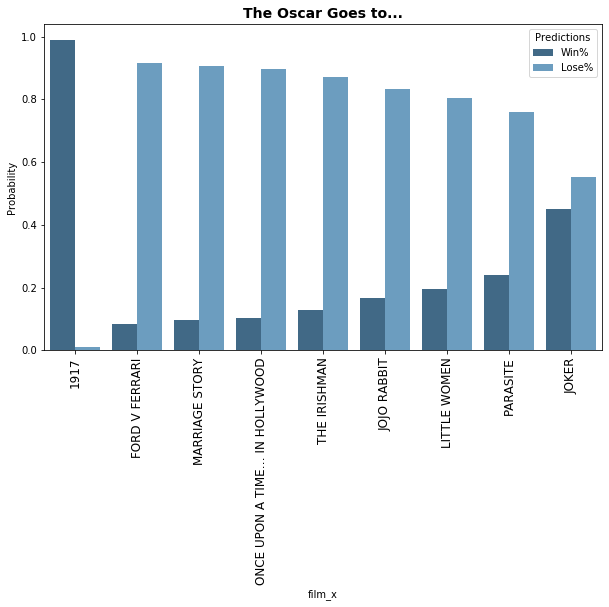

In [44]:
#visualisation
chart = pd.melt(oscar_predictions2020_final, id_vars='film_x', var_name="Predictions", value_name="Probability")
chart2 = chart.loc[chart.Predictions !='Prediction']
chart2=chart2.sort_values('Probability',ascending=False)

fig, ax = plt.subplots(figsize= (10,6))

a = sns.barplot(chart2.film_x, chart2.Probability, hue=chart2.Predictions,palette="Blues_d")
a.set_title('The Oscar Goes to...',size = 14,fontweight='bold')
plt.xticks(rotation=90, size=12)
;

In [45]:
# Checking weights of the model
coeffs = pd.DataFrame(model.coef_)
coeffs = coeffs.T
coeffs.columns = ['Coefficient']
new_cats = pd.DataFrame(train_LR.columns)
new_cats.columns = ['category']
CO = pd.merge(new_cats, coeffs, how='inner', left_index=True, right_index=True)
CO['Coefficient'] = round(CO['Coefficient'],2)
CO = CO.sort_values('Coefficient',ascending=False)

Text(0.5, 1.0, 'Weights of categories')

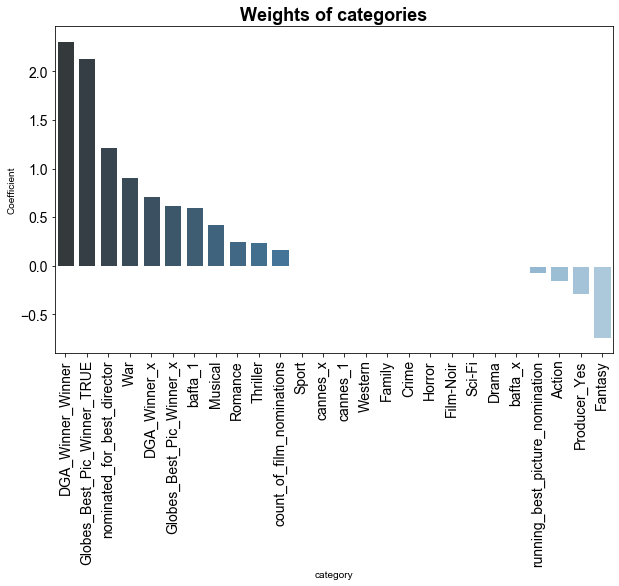

In [46]:
#plotting the weights 

fig, ax = plt.subplots(figsize= (10,6))

sns.set()

a = sns.barplot(x = CO.category,y=CO.Coefficient,palette="Blues_d")
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)

a.set_title('Weights of categories',size = 18,fontweight='bold')

The directors` guild award have the highest weight in the model, followed by Best Picture Golden Globes and
Oscar Nominations for best director. Fantasy Genre and Directors producing the films are the strongest negative weight